<a href="https://colab.research.google.com/github/michalis0/Business-Intelligence-and-Analytics/blob/master/week6%20-%20SQL2/SQL2_Walkthrough.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Week 6 - SQL (2/2) - Walkthrough

This week, we continue to explore the various queries you should know when using SQL. 

In this walkthrough, we will show you more advanced functions you need to know by using the `coronavirus` and the `GDP` datasets. First let's import them

##Setup

In [1]:
# import librairies
import pandas as pd
from sqlalchemy import create_engine
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# create the database
db = create_engine('sqlite://', echo=False)

# first table
csvfile = 'https://raw.githubusercontent.com/michalis0/Business-Intelligence-and-Analytics/master/data/CovidData2021.csv'
df = pd.read_csv(csvfile, delimiter=';')
df['country'] = df['country'].astype('category')
df['date'] = df['date'].astype('object')
for column in ['cases', 'deaths', 'tests', 'vaccinations']:
  df[column] = df[column].astype('int64')
  df.drop(df[df[column] < 0].index, inplace=True)
df = df.drop('vaccinations', axis = 'columns')
table_name = 'coronavirus'
df.to_sql(table_name, con=db)

# second table
csvfile = 'https://raw.githubusercontent.com/MathildeBoccara/Business-Intelligence-and-Analytics/master/GDP.csv'
df = pd.read_csv(csvfile)
table_name = "countries"
df.to_sql(table_name, con=db) # populate it with the data


##Data
Look at a sample of the two tables.

In [2]:
query = "SELECT * FROM countries LIMIT 5"
sql_df = pd.read_sql(query, con=db)
sql_df

,index,Country,GDP,GDPgrowth,Population,GDP_per_capita
0,0,Albania,1.303854e+10,3.84,2884169,4521
1,1,Andorra,3.012924e+09,1.87,77001,39128
2,2,Austria,4.168360e+11,3.04,8819901,47261
3,3,Belarus,5.445647e+10,2.42,9450231,5762
4,4,Belgium,4.947640e+11,1.73,11419748,43325


In [3]:
query = "SELECT * FROM coronavirus LIMIT 5"
sql_df = pd.read_sql(query, con=db)
sql_df

,index,country,date,cases,deaths,tests
0,0,Albania,25.02.2020,0,0,8
1,1,Albania,26.02.2020,0,0,5
2,2,Albania,27.02.2020,0,0,4
3,3,Albania,28.02.2020,0,0,1
4,4,Albania,29.02.2020,0,0,8


## Joins


###Cartesian Products
Let's take a quick look at what happens if you select elements from two differents tables.

In [4]:
query = """
SELECT coronavirus.country, countries.population
FROM coronavirus, countries
"""
sql_df = pd.read_sql(query, con=db)
sql_df

,country,Population
0,Albania,2884169
1,Albania,77001
2,Albania,8819901
3,Albania,9450231
4,Albania,11419748
...,...,...
739237,Vatican,46647428
739238,Vatican,9904896
739239,Vatican,8455804
739240,Vatican,44487709


Here, way to many rows are returned! We simply did a cartesian product which is not really relevant.

###Inner join
Remember that in order to avoid what just happened, you need to put a join condition.


In [5]:
query = """
SELECT DISTINCT(coronavirus.country), countries.population
FROM coronavirus, countries
WHERE coronavirus.country = countries.Country
ORDER BY countries.population DESC"""
sql_df = pd.read_sql(query, con=db)
sql_df

,country,Population
0,Russia,145530082
1,Germany,82658409
2,United Kingdom,66727461
3,France,64842509
4,Italy,60673701
5,Spain,46647428
6,Ukraine,44487709
7,Poland,37953180
8,Romania,19653969
9,Netherlands,17021347


You can also use the command **join** as follows.

In [6]:
query = """
SELECT DISTINCT(coronavirus.country), countries.population
FROM coronavirus
JOIN  countries on coronavirus.country = countries.Country
ORDER BY countries.population DESC
"""
sql_df = pd.read_sql(query, con=db)
sql_df

,country,Population
0,Russia,145530082
1,Germany,82658409
2,United Kingdom,66727461
3,France,64842509
4,Italy,60673701
5,Spain,46647428
6,Ukraine,44487709
7,Poland,37953180
8,Romania,19653969
9,Netherlands,17021347


Here, we use the DISTINCT query to avoid duplication.

####**Visualization**

Here let's plot a bar chart of the countries' population.

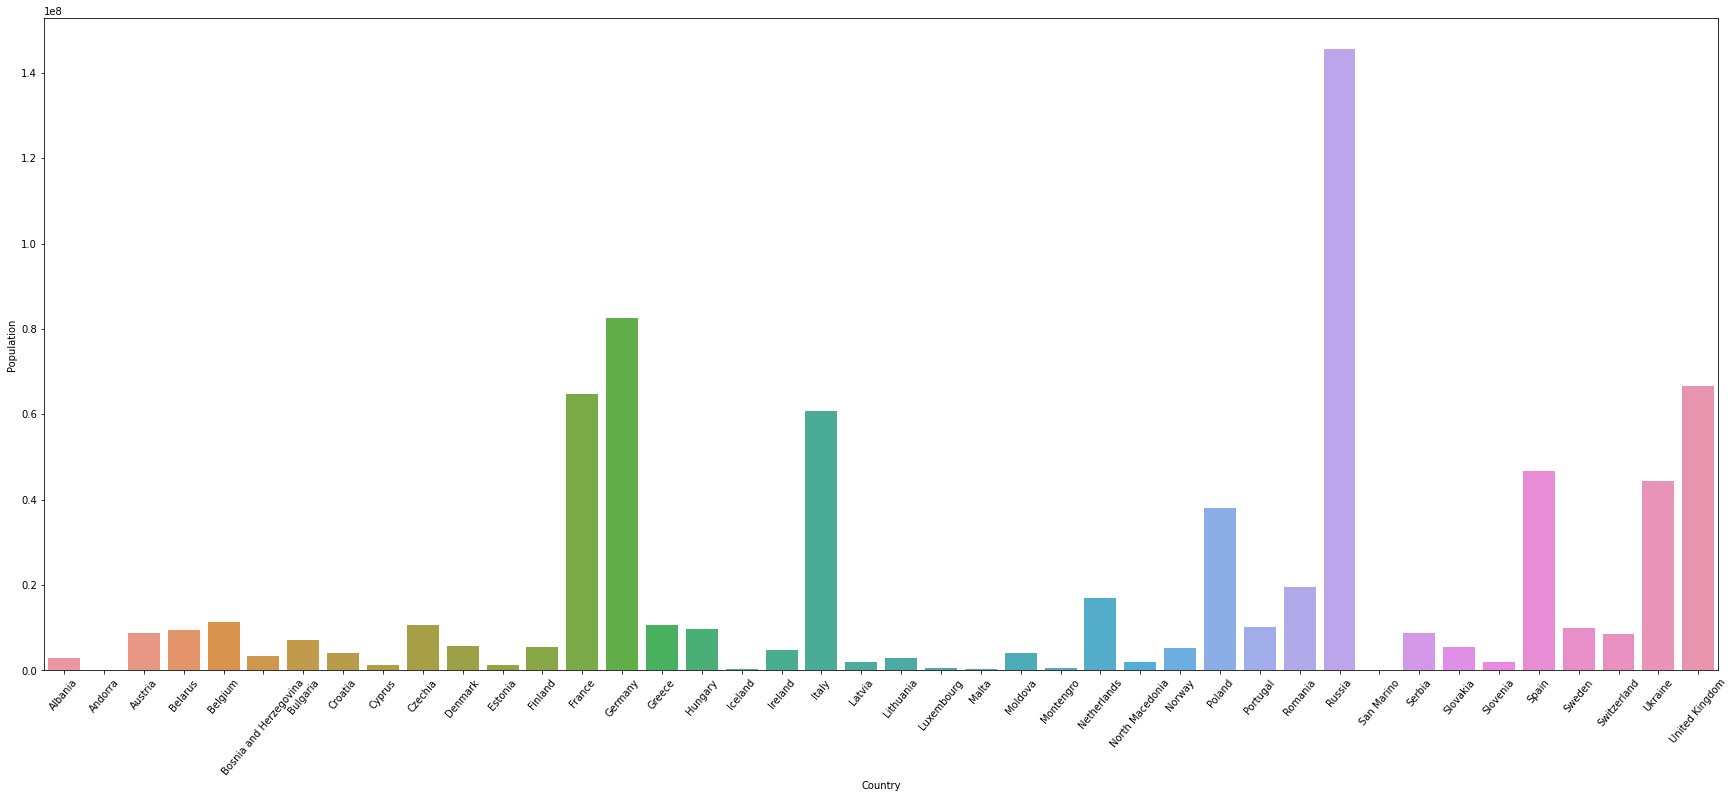

In [7]:
query = "SELECT Country, Population FROM countries"
sql_df = pd.read_sql(query, con=db)
sql_df

fig = plt.gcf() #the aera of the plt figure
fig.set_size_inches(30, 12) #resize the figure
ax = sns.barplot(x="Country", y="Population", data=sql_df)
for item in ax.get_xticklabels():
    item.set_rotation(50)
plt.show()


###Self join
A self join consits in joining a table with itself.

**Example** :
Imagine we want to find all pairs of countries where the numbers of `tests` are equal. 

In [8]:
query = """
SELECT DISTINCT(A.country) AS country_1, B.country AS country_2, A.tests, A.date
from coronavirus A, coronavirus B
where A.tests = B.tests and A.date = B.date and A.country <> B.country
"""
sql_df = pd.read_sql(query, con=db)
sql_df


,country_1,country_2,tests,date
0,Albania,Estonia,8,29.02.2020
1,Albania,Serbia,3,01.03.2020
2,Albania,Andorra,0,23.03.2020
3,Albania,Austria,0,23.03.2020
4,Albania,Belarus,0,23.03.2020
...,...,...,...,...
95775,Vatican,Spain,0,06.03.2021
95776,Vatican,Sweden,0,06.03.2021
95777,Vatican,Switzerland,0,06.03.2021
95778,Vatican,Ukraine,0,06.03.2021


###Left join
Remember that The LEFT JOIN keyword returns all records from the left table, and the matched records from the right table. 

**Example** : Find all countries having less than 1'000'000 of inhabitants where there was a day with 13 cases.

In [9]:
query = """
SELECT DISTINCT(coronavirus.country), coronavirus.cases, countries.population
From coronavirus
LEFT JOIN countries ON coronavirus.country = countries.Country
WHERE countries.population < 1000000 and coronavirus.cases = '13'
ORDER BY countries.population ASC
"""
sql_df = pd.read_sql(query, con=db)
sql_df

,country,cases,Population
0,San Marino,13,33671
1,Andorra,13,77001
2,Iceland,13,334393
3,Malta,13,437933
4,Luxembourg,13,591910


##Subqueries

###Decomposing Queries
Here, we want to find the countries where the number of deaths was above the average deaths.

In [10]:
query = """
SELECT Country, AVG(deaths) as deaths_avg
FROM coronavirus
GROUP BY country
HAVING AVG(deaths)> (SELECT AVG(deaths) FROM coronavirus)
ORDER BY AVG(deaths) ASC
"""
sql_df = pd.read_sql(query, con=db)
sql_df

,country,deaths_avg
0,Romania,55.610667
1,Belgium,56.457071
2,Czechia,58.779292
3,Ukraine,76.943089
4,Poland,122.226158
5,Germany,178.617866
6,Spain,183.078283
7,France,216.708122
8,Russia,217.588529
9,Italy,248.439698



In some case, our subquery returns more than one single value. All the countries where there was more than 1000 deaths.

In [11]:
query = """
SELECT country, deaths
FROM coronavirus
WHERE country in
(SELECT country FROM coronavirus WHERE deaths>1000)
"""
sql_df = pd.read_sql(query, con=db)
sql_df

,country,deaths
0,France,0
1,France,0
2,France,0
3,France,0
4,France,0
...,...,...
1589,United Kingdom,343
1590,United Kingdom,487
1591,United Kingdom,242
1592,United Kingdom,236


####**Visualization**
Let's use a boxplot to have a better overview of deaths distribution.

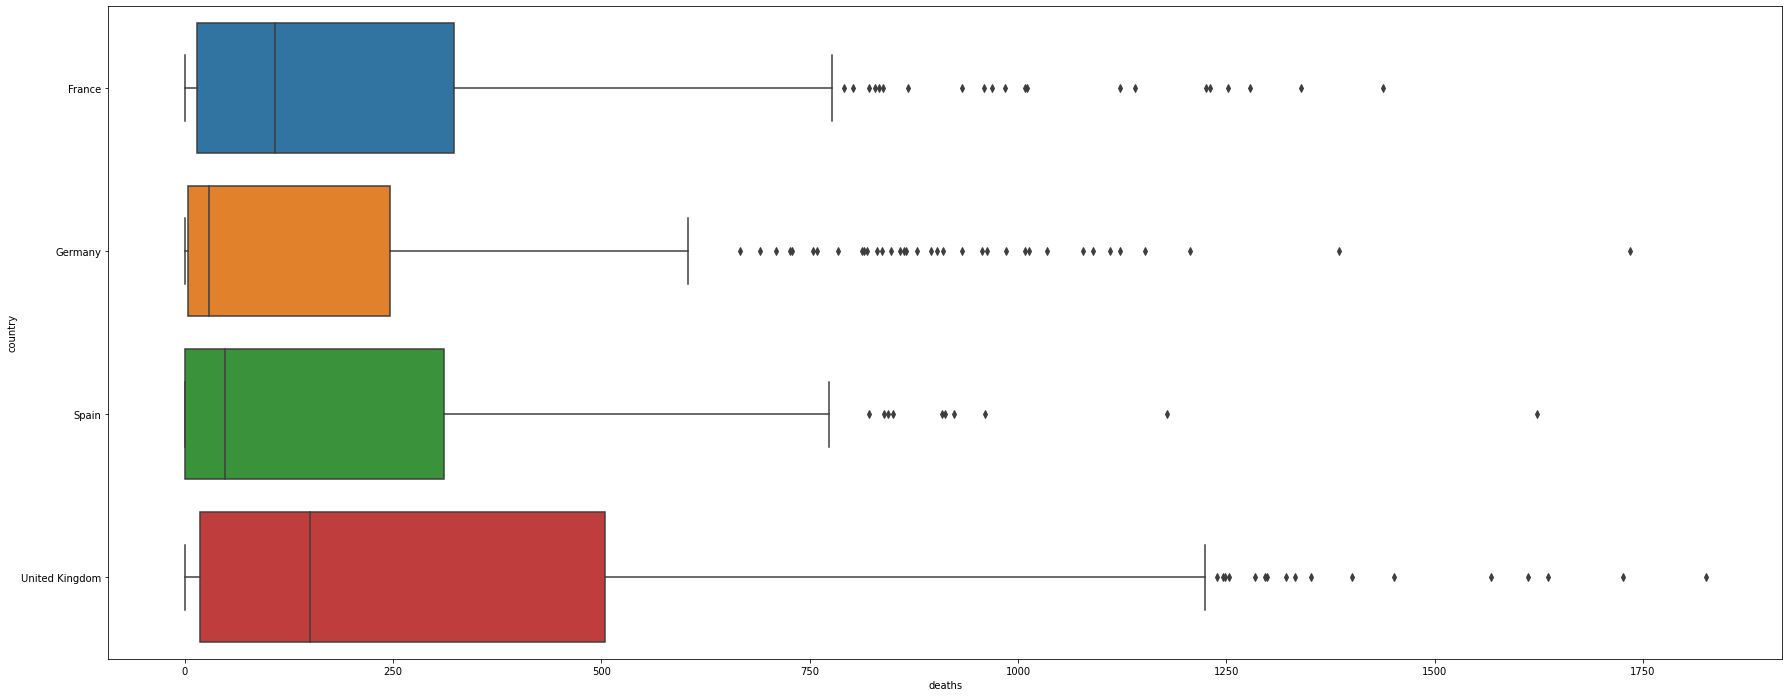

In [12]:
fig = plt.gcf() #the aera of the plt figure
fig.set_size_inches(30, 12) #resize the figure
ax = sns.boxplot(x="deaths", y="country", data=sql_df,)

We can also plot a line plot of these countries deaths. Since this value can quite vary between two days we will plot the 7-day [moving average](https://en.wikipedia.org/wiki/Moving_average) of three countries cases.

In [13]:
#Select appropiate data
query = """
SELECT country, deaths, date 
FROM coronavirus
WHERE Country like 'France'
"""
sql_df_F = pd.read_sql(query, con=db)


query = """
SELECT country, deaths, date 
FROM coronavirus
WHERE Country like 'Germany'
"""
sql_df_G = pd.read_sql(query, con=db)

query = """
SELECT country, deaths, date 
FROM coronavirus
WHERE Country like 'Spain'
"""
sql_df_S = pd.read_sql(query, con=db)




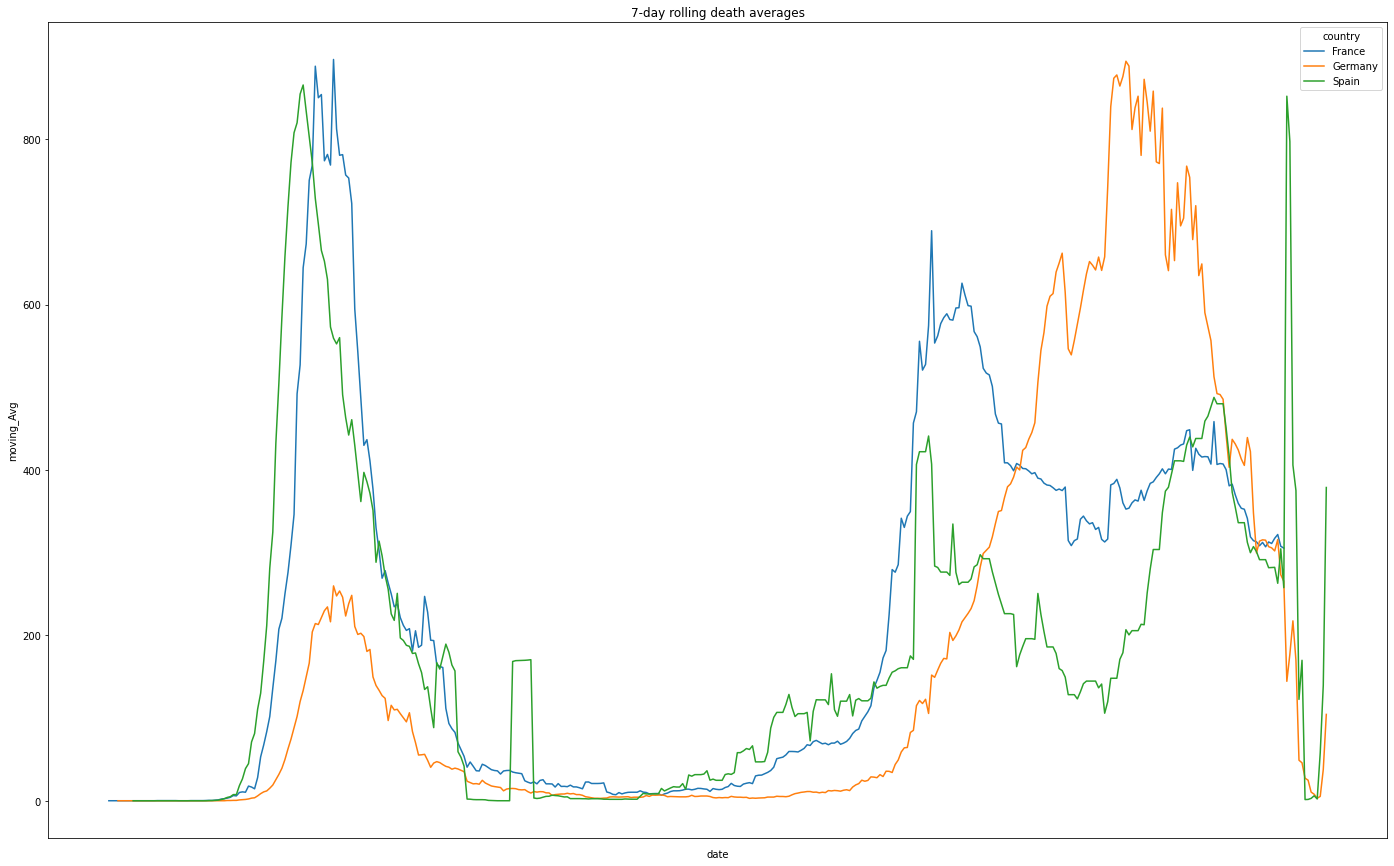

In [14]:
# 7-day rolling average
sql_df_F['moving_Avg'] = sql_df_F["deaths"].rolling(window=7).mean()
sql_df_G['moving_Avg'] = sql_df_G["deaths"].rolling(window=7).mean()
sql_df_S['moving_Avg'] = sql_df_S["deaths"].rolling(window=7).mean()

#Merge results
all = pd.concat([sql_df_F, sql_df_G, sql_df_S])

#Plot deaths lineplot
fig=plt.figure(figsize=(24,15))
sb = sns.lineplot(x=all['date'], y=all['moving_Avg'], hue = all['country'])
sb.set_title("7-day rolling death averages")
sb.set(xticklabels=[])
sb.tick_params(bottom=False)

##Complex Queries

Remember that using to many different queries can make it difficult to understand what we are looking for. We can use WITH...AS in order to simplify the query.

Let's find the GDP of all countries were the number of deaths is higher than 1000.

In [15]:
query="""
WITH lots_of_deaths AS(
  SELECT country
  FROM coronavirus
  WHERE deaths > 1000
)
SELECT Country, GDP
FROM countries WHERE Country in lots_of_deaths
"""
sql_df = pd.read_sql(query, con=db)
sql_df

,Country,GDP
0,France,2.582500e+12
1,Germany,3.693200e+12
2,Spain,1.314310e+12
3,United Kingdom,2.637870e+12


###Nested Queries

It is possible to find the same result by using a nested query.

In [16]:
query = """
SELECT country, GDP
FROM countries
WHERE country IN
(SELECT country 
FROM coronavirus WHERE deaths > 1000)

"""
sql_df = pd.read_sql(query, con=db)
sql_df

,Country,GDP
0,France,2.582500e+12
1,Germany,3.693200e+12
2,Spain,1.314310e+12
3,United Kingdom,2.637870e+12


###Case-When-Else

This queries are used to add conditions on SQL.

**Example** : Let's consider that a country economy is developped if the GDP per capita is higher than 25,000$.

In [17]:
query= """
SELECT country, GDP_per_capita,
CASE
WHEN GDP_per_capita > 25000 THEN 'Developed'
WHEN GDP_per_capita < 24999 THEN 'Developing'
END AS Economy
FROM countries
"""
sql_df = pd.read_sql(query, con=db)
sql_df

,Country,GDP_per_capita,Economy
0,Albania,4521,Developing
1,Andorra,39128,Developed
2,Austria,47261,Developed
3,Belarus,5762,Developing
4,Belgium,43325,Developed
5,Bosnia and Herzegovina,5387,Developing
6,Bulgaria,8197,Developing
7,Croatia,13200,Developing
8,Cyprus,18695,Developing
9,Czechia,20291,Developing
